In [1]:
from scipy.stats import binom, bernoulli, norm
import numpy as np
import matplotlib.pyplot as plt

Binomial Method: (0.24159533118103438, 0.2585709989427606)
Normal Method: (0.2493801636078889, 0.2507861665159061)


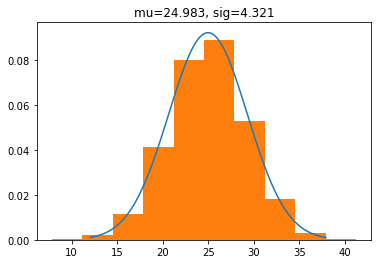

In [2]:
# binomial distributions 
n = 100
p = 0.25
rv = binom(n, p)

# x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
bi = binom(n, p)
samples = bi.rvs(100000)
mu = samples.mean()
sig = samples.std()

x = np.linspace(mu - 3*sig, mu + 3*sig, 100)
y = norm.pdf(x, mu, sig) 
rvs = norm.rvs(mu, sig, 10000)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.hist(rvs, density=True)
ax.set_title(f"mu={round(mu, 3)}, sig={round(sig, 3)}")

def prop_conf_interval(rvs, n=100, conf=0.95):
    """Calculate Confidence Intervals for proportion."""
    samples = len(rvs)
    phat = rvs.mean() / n
    constant = np.sqrt((phat*(1-phat)) / samples)
    probit = (1 - 0.95) * 0.5 # (1 - desired error) * 0.5
    ci = np.abs(norm.ppf(probit))
    lower = phat - (ci * constant)
    upper = phat + (ci * constant)
    return (lower, upper)

def norm_conf_interval(rvs, conf=0.95):
    """Calculate Confidence Intervals for normal continuous data."""
    n = len(rvs)
    phat = rvs.mean() / 100
    sig = rvs.std() / 100
    constant = sig / np.sqrt(n)
    ci = np.abs(norm.ppf(conf))
    lower = phat - (ci * constant)
    upper = phat + (ci * constant)
    return (lower, upper)

print('Binomial Method:', prop_conf_interval(rvs))
print('Normal Method:', norm_conf_interval(rvs))

https://www.youtube.com/watch?v=tTeMYuS87oU
- pete guesses 28 / 100 suits of cards, does he have better than random odds? 
- null hypothesis is the same as random guessing (0.25)
- alternative hypothesis is p > 0.25

##### Null Hypothesis:
\begin{align}
\text{where} \\
H_{0} ~\text{is population mean} \\
\mu_{0} ~\text{is hypothesized value} \\
\end{align}

- Use a Z-test if sigma is known (which is rare).
- Otherwise, use a T-test if sigma is not known. 

##### One tailed-tests: 
\begin{align}
H_{\alpha}: \mu < \mu_{0} \\
H_{\alpha}: \mu > \mu_{0} \\
\end{align}

##### Two tailed-tests: 
\begin{align}
H_{\alpha}: \mu \neq \mu_{0} \\
\end{align}

##### To test null hypothesis we use the test statistic (Z-test):
\begin{align}
Z &= \frac{\bar{X} - \mu}{\sigma_{\bar{X}}} \\
\\
\text{where}~ \sigma_{\bar{X}} &= \frac{\sigma}{\sqrt{n}} \\
\end{align}

If this test statistic (H_{(0}) is true, then the Z test statistic will have the standard normal distribution

##### Example of Z-Test:
Suppose a supplier to a sushi restaurant claims their tuna contains no more than 0.40 ppm of mercury on average. Resturaunter doesn't belive this. 

We will test the null hypothesis with a one-tailed test:

\begin{align}
H_{0}: \mu &= 0.40 \\
H_{\alpha}: \mu &> 0.40 \\
\end{align}

In a random sample of 16 pieces of tuna from this supplier, there was an average of `0.74 ppm` of mercury. Does this yield strong evidence that the true mean mercury content is greater than `0.4`? Suppose it's known that `sig = 0.08 ppm`. In the real world sigma is usually unknown. 

((array([-1.72352605, -1.26569652, -0.97848645, -0.75533862, -0.56472935,
         -0.39279634, -0.23181469, -0.07666006,  0.07666006,  0.23181469,
          0.39279634,  0.56472935,  0.75533862,  0.97848645,  1.26569652,
          1.72352605]),
  array([0.55939456, 0.57807965, 0.58739196, 0.64581041, 0.67080334,
         0.72112614, 0.72315903, 0.72328572, 0.7592359 , 0.77499955,
         0.77767518, 0.80355538, 0.83270506, 0.83464281, 0.85229385,
         0.85661179])),
 (0.10208971481595668, 0.7312981454063543, 0.9721439931398386))

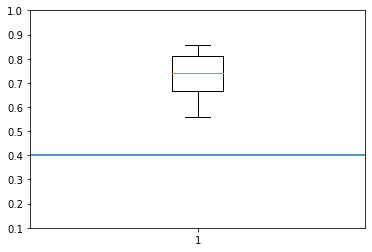

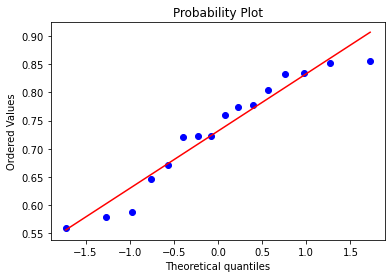

In [3]:
import numpy as np
import scipy.stats as stats

obs = np.random.normal(loc=0.74, scale=0.08, size=16)

# Box Plot to verify that distribution is above population mean
fig, ax = plt.subplots()
ax.boxplot(obs)
ax.axhline(0.4)
ax.set_ylim(0.1, 1)

# https://data.library.virginia.edu/understanding-q-q-plots/
# quantile quantile plot to verify that observations are normally distributed
fig, ax = plt.subplots()
stats.probplot(obs, dist="norm", plot=ax)

Z =  16.999999999999996
P-Value =  0.0


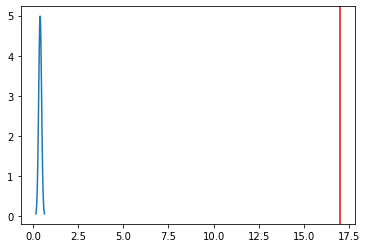

In [4]:
# Test Null Hypothesis
xbar = 0.74
mu = 0.4
sig = 0.08
n = 16

# Z test statistic
def Z_test(xbar, mu, sig, n):
    return (xbar - mu) / (sig / np.sqrt(n))

Z = Z_test(xbar, mu, sig, n)
print('Z = ', Z)

# Percent Z statistic came from std normal dist
p_value = 1. - stats.norm.cdf(Z)
print('P-Value = ', p_value)

# If null hypothesis is true, 
# Z should be a random sample from a std normal dist
fig, ax = plt.subplots()
x = np.linspace(mu - 3*sig, mu + 3*sig, 100)
y = norm.pdf(x, mu, sig) 
ax.plot(x, y) #plot expected normal dist
ax.axvline(Z, color='r') #plot Z as vline

# NULL HYPOTHESIS IS DISPROVED

Rejection region approach involves choosing a value for alpha, the probability of rejecting the null hpothesis if it is true. Often, people choose 0.05.

Reject the null hypothesis if the test statistic falls in the rejection region. 

$$
\text{with} ~\alpha = 0.05 ~\text{and a two sided test}\\
\text{Reject} ~H_{0} ~\text{if} \\
Z \geq 1.96 ~\text{or} \\
Z \leq -1.96 \\
\\
\text{for a one sided test}\\
Z \leq -1.645 \\
$$

##### Example: 

$$
H_{0}: \mu = \mu_{0} \\
H_{\alpha}: \mu > \mu_{0} \\
\alpha=0.01 \\
\\
Z = \frac{\bar{X} - \mu_{0}}{\sigma_{\bar{X}}} = 3.1
$$

We would reject $H_{0}$ if $Z \geq 1.28$, which in this case is true, so we can reject the null hypothesis. 

This gets somewhat silly when the Z value gets very close to the critical value of rejection. Because of this, many people refer the p-value approach. 

In [5]:
# lookup a standard normal Z value using an alpha
print(stats.norm.ppf(0.025))

# lookup percent of area below/above critical value
print(stats.norm.interval(0.025))

-1.9599639845400545
(-0.03133798202142662, 0.03133798202142648)


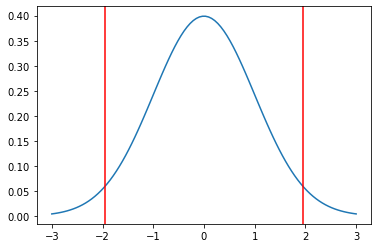

In [6]:
#plot of standard normal distribution with critical values

alpha = 0.05
mu = 0
sig = 1

crit1, crit2 = stats.norm.ppf(alpha/2), abs(stats.norm.ppf(alpha/2))

fig, ax = plt.subplots()
x = np.linspace(mu - 3*sig, mu + 3*sig, 100)
y = norm.pdf(x, mu, sig) 
ax.plot(x, y) #plot expected normal dist

crit1_line = ax.axvline(crit1, color='r') #plot Z as vline
crit2_line = ax.axvline(crit2, color='r') #plot Z as vline


##### P-Value instead of Rejection Region:
The p-value is the probability of getting the observed value of the test statistic, or a value with even greater evidence against $H_{0}$, *if the null hypothesis is true.*

The p-value is the area of a standard normal distribution (whose area sums to 1) to the right of the Z score. 

$$
Z = \frac{\bar{X} - \mu_{0}}{\sigma_{\bar{X}}}
$$

The smaller the p-value, the greater the evidence against the null-hypothesis. Alpha is still used as a significance level

In [7]:
# lookup p-value (probability) given a Z score
Z = 1.53

# with right tail
print(stats.norm.sf(Z))

# with left tail
print(stats.norm.cdf(Z))

0.06300836446397844
0.9369916355360216


##### Example:
Cereal boxes with a stated weight of $\mu = ~750$ grams and $\sigma = ~16$. In order to avoid underfilling, the producer sets the mean fill amount at 780 grams. If we draw a random sample of 25 boxes, and test the null hypothesis that the mean fill amount in 780 grams. 

\begin{align}
H_{0}: \mu &= 780 \\
H_{\alpha}: \mu &\neq 780 \\
\end{align}

For a sample of 25 boxes $\bar{X} = 776$ and $\sigma = 16$. Does this give strong evidence that the true mean weight differs from 780 grams? 

##### Z-test: 

$$
Z = \frac{\bar{X} - \mu_{0}}{\frac{\sigma}{\sqrt{n}}}
$$


Z of -1.25
prob of 0.2112995473337107
Null Hypothesis Proven: True


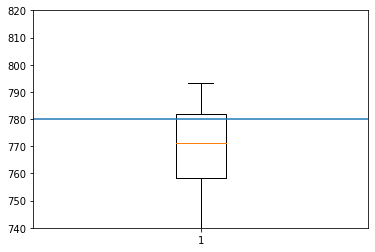

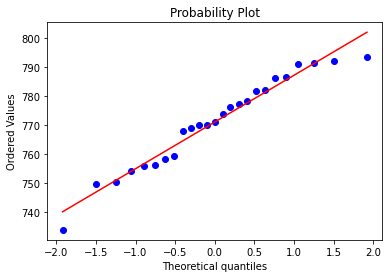

In [8]:
mu_null = 780
mu = 776
sig = 16
n = 25

obs = np.random.normal(loc=mu, scale=sig, size=n)

# Box Plot to verify that distribution is above population mean
fig, ax = plt.subplots()
ax.boxplot(obs)
ax.axhline(mu_null)
ax.set_ylim(740, 820)

# quantile quantile plot to verify that observations are normally distributed
fig, ax = plt.subplots()
stats.probplot(obs, dist="norm", plot=ax)

# lookup z-value
Z = Z_test(mu, mu_null, sig, n)
print(f'Z of {Z}')

# convert Z to probability
p_value = 2 * stats.norm.cdf(Z) #one sided prob
print(f'prob of {p_value}')

alpha = 0.05
print(f'Null Hypothesis Proven: {p_value > alpha}')

##### Type I Error:

$H_{0}$ is True and tests rejected it: **Type I Error** (false alarm / wrong acquital). 

We get to pick our $\alpha$ which represents the probability of a **Type I** error, also known as the significance level of the test. 

$P(\text{Type I error} ~| H_{0}~\text{is True}) = \alpha$

##### Type II Error:

$H_{0}$ is False and tests do not reject it: **Type II Error** (missed opportunity / wrongful conviction).


The probability of a Type II error is represented by $\beta$. The value of $\beta$ depends on a number of factors, including the choice of $\alpha$, the **sample size**, and the true value of the parameter. 

The power of a test is the probability of rejecting $H_{0}$ given it is false. 

$Power = 1 - P(\text{Type II error}) = 1 - \beta$

Power ($1 - \beta$) increases as:
- $\alpha$ increases
- *n* increases
- $\sigma$ decreases
- The true value of $\mu$ gets fruther from $\mu_{0}$ (in the direction of the alternative hypothesis.)

##### Statistical Significance (Interpreting P-Value):
Statistical significance is strongly related to sample size; if the sample size is large enough, even tiny differences from the hypothesized value will be found statistically significant. This is where a one-sided test may be better. 

In addition to the result of a hypothesis test it is best to also report an appropriate confidence interval. The interval illustrates the size of the effect, and can help to determine if the effect has any practical importance. 

The confidence interval will be made up of all values of $\mu_{0}$ for which we would not reject the null hypothesis. 

Confidence interval = $(1 - \alpha)$ for two-sided tests

##### P-Value (https://www.youtube.com/watch?v=BJZpx7Mdde4&list=PLvxOuBpazmsNo893xlpXNfMzVpRBjDH67&index=11)
*p*-value is the probability of getting the observed value of the test statistic, or a value with even greater evidence against $H_{0}$, *if the null hypothesis is true.* More likely to get *p*-values closer to 0 when null hypothesis is False, then when it is True. *p* < 0.01 is very strong evidence against $H_{0}$, < 0.05 is strong, <0.1 is weak, > 0.1 is little or no evidence against $H_{0}$. 
 
 ##### Scipy
- `Norm.ppf` : *p* -> Z
- `Norm.cdf` : *Z* -> *p*
- `Norm.sf` : *Z* -> (1 - *p*) #one sided
- `Norm.sf` : *Z* -> (1 - *p*) * 2 #two sided


Supposer we are about to randomy sample 36 values from a normally distributed population, where $\sigma = 21$ but $\mu$ is unknown. We are going to test:

$$
H_{0}: \mu = 50 \\
H_{\alpha}: \mu < 50 \\
\alpha=0.09 \\
$$
<br/>
$$
Z = \frac{\bar{X} - \mu_{0}}{\frac{\sigma}{\sqrt{n}}}
$$


In [17]:
# find Z knowing alpha
norm.ppf(0.09)

-1.3407550336902165

##### Isolate $\bar{X}$:
For what values of $\bar{X}$ will we reject $H_{0}$? Knowing what the minimum Z is. 

$$
\bar{X} = Z \frac{\sigma}{\sqrt{n}} + \mu_{0}
$$

$$\bar{X} = 50 + \frac{21}{\sqrt{36}}*-1.34$$

In [86]:
mu = 50
xbar = 40
sig = 21
n=36

def calc_min_xbar(alpha, mu, sig, n):
    return mu + (sig / np.sqrt(n)) * norm.ppf(alpha)

min_xbar = calc_min_xbar(alpha, xbar, sig, n)
print(f'Reject null hypothesis if Xbar is less than: {min_xbar}')


Reject null hypothesis if Xbar is less than: 34.24301230566984


If $\mu = 43$ what is `P(Type II error)` (Missed Opportunity)?

$$
H_{0}: \mu = 50 \\
H_{\alpha}: \mu < 50 \\
$$

Probability of `Type II error` is $P(\text{Do not reject}~H_{0}~| \mu = 43)$ or in other words, $P(\bar{X} > 45.31~| \mu=43)$.


Probability of Type 2 error: 0.9500000000000001
Power of test: 0.04999999999999993


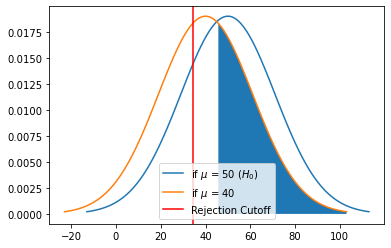

In [87]:

fig, ax = plt.subplots()

# --- plot H0 ---
x1 = np.linspace(mu - 3*sig, mu + 3*sig, 100)
y1 = norm.pdf(x1, mu, sig) 
ax.plot(x1, y1, label=f'if $\mu$ = {mu} ($H_{0}$)')

# --- plot Xbar ---
x2 = np.linspace(xbar - 3*sig, xbar + 3*sig, 100)
y2 = norm.pdf(x2, xbar, sig) 
ax.plot(x2, y2, label=f'if $\mu$ = {xbar}')

# --- plot rejection cutoff ---
crit = ax.axvline(min_xbar, color='r', label='Rejection Cutoff') #plot Z as vline

# --- fill in error region ---
error2 = ax.fill_between(x2, y2, where=x2 > Xbar)
plt.legend()

beta = 1 - norm.cdf(Z_test(min_xbar, xbar, sig, n)) #beta = prob Type 2 error
power = 1 - beta
print(f'Probability of Type 2 error: {beta}')
print(f'Power of test: {power}')

##### T-Tests:
The null hypotheisis is $H_{0}: \mu = \mu_{0}$
<br/>

We choose one of the possible alternatives:
- $H_{a}: \mu < \mu_{0}$
- $H_{a}: \mu > \mu_{0}$
- $H_{a}: \mu \neq \mu_{0}$

Suppose we are drawing a simple random sample of *n* observations from a normally distributed population. 
<br/>

To test $H_{0}: \mu = \mu_{0}$, we use either a *Z* test or a *t* test. 
<br/>

if $\sigma$ of the population is known (very rare):
$$
Z = \frac{\bar{X} - \mu_{0}}{\sigma_{\bar{X}}} = \frac{\bar{X} - \mu_{0}}{\frac{\sigma}{\sqrt{n}}} 
$$

if $\sigma$ is unknown:
$$
t = \frac{\bar{X} - \mu_{0}}{SE(\bar{X})} = \frac{\bar{X} - \mu_{0}}{\frac{s}{\sqrt{n}}} 
$$

Because we almost never know the population standard deviation, we can estimate it with the standard deviation of the sample (*s*), normalized by the square root of the number of samples. We call this the **standard error (SE)**. 

The test statistic does not have the standard normal distribution. If $H_{0}$ is true, the test statistic will have a t distribution with n-1 degrees of freedom.

The *t* distribution is very similar to the normal distribution, but with a lower peak and heavier tales. As the degrees of freedom increases, the t distribution looks closer to the standard normal. 

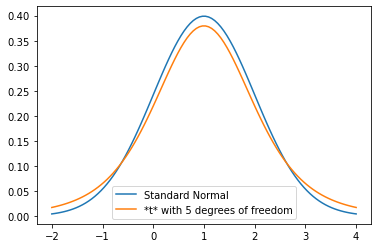

In [91]:
mu=1
sig=1

fig, ax = plt.subplots()

x1 = np.linspace(mu - 3*sig, mu + 3*sig, 100)
y1 = norm.pdf(x1, mu, sig) 
ax.plot(x1, y1, label=f'Standard Normal')

y2 = stats.t.pdf(x1, 5, mu, sig) 
ax.plot(x1, y2, label=f'*t* with 5 degrees of freedom')

plt.legend()

##### Example T-Test:
25 dehydrated athletes take the test. They have an average reaction time of 1.00 seconds, with a standard deviation of 0.18 seconds. Does this yield strong evidence that the true mean reaction time for dehydrated athletets is different from 0.95 seconds? 

$$
H_{0}: \mu = 0.95 \\
H_{a}: \mu \neq 0.95 \\ 
\alpha = 0.05
$$

Because the standard deviation is calculated using the obeservations and not the population, it is  *t-test* and not a *Z-test*. 

This is a *t-test* on one mean, however *t-tests* are most useful on means when comparing two groups. 

t of 1.3888888888888902
prob of 0.17764475349714037
Null Hypothesis Proven: False


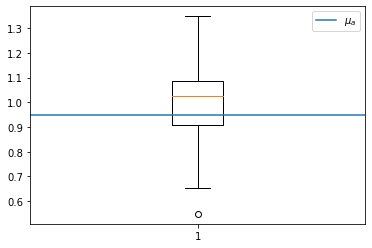

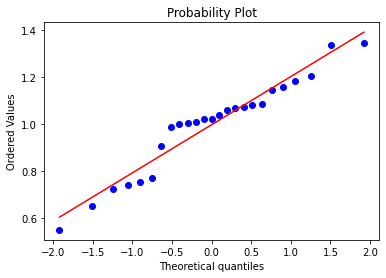

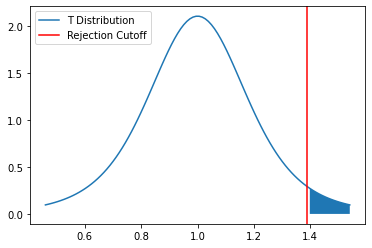

In [117]:
mu_null = 0.95
mu = 1.00
sig = 0.18
n = 25
alpha = 0.05
df = 5

obs = np.random.normal(loc=mu, scale=sig, size=n)

# Box Plot to verify that distribution is above population mean
fig, ax = plt.subplots()
ax.boxplot(obs)
ax.axhline(mu_null, label='$\mu_{a}$')
plt.legend()
# ax.set_ylim(740, 820)

# quantile quantile plot to verify that observations are normally distributed
fig, ax = plt.subplots()
stats.probplot(obs, dist="norm", plot=ax)

# lookup p-value
t_test = Z_test #same except for source of SE / 
t = t_test(mu, mu_null, sig, n)
print(f't of {Z}')

# convert t to probability
p_value = 2 * stats.t.cdf(t, df=5) / 10 #one sided prob
print(f'prob of {p_value}')

# plot t
fig, ax = plt.subplots()
x1 = np.linspace(mu - 3*sig, mu + 3*sig, 100)
y1 = stats.t.pdf(x1, df, mu, sig) 
ax.plot(x1, y1, label=f'T Distribution')

# --- plot rejection cutoff ---
crit = ax.axvline(t, color='r', label='Rejection Cutoff') #plot Z as vline

# --- fill in error region ---
error2 = ax.fill_between(x1, y1, where=x1 > t)
plt.legend()


print(f'Null Hypothesis Proven: {t_value < alpha}')

In [114]:
stats.t.cdf(t, df)

0.8882237674857019

In [115]:
t

1.3888888888888902